In [1]:
import pandas as pd
import glob,os
import numpy as np


import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'


In [2]:
import tensorflow as tf

# 整合成dataframe

In [39]:
filenames= []
for m in range (10):
    for n in range(m+1,11):        
        strm = 'soc_start_'+str(m)
        strn = 'soc_end_'+str(n)
        path=r'/Users/wuzhengrun/Desktop/jupyter_notebooks/0929data/'+strm+'/'+strn
        filename=glob.glob(os.path.join(path, "*.csv"))
        filenames.extend(filename)

dl = []
for f in filenames:
    dl.append(pd.read_csv(f, header=0, sep=','))
df = pd.concat(dl).loc[:, ['set_P','SOC_start','SOC_end','set_SOH','delta_SOH']]
df.iloc[:,0].size

874668

# 数据标准化

In [40]:
zscores = preprocessing.StandardScaler()
# zscore标准化
zscore = zscores.fit_transform(df)
df_zscore = pd.DataFrame(zscore,index=df.index,columns = df.columns)#df.columns
df_comp = sklearn.utils.shuffle(df_zscore)
df_comp.head(10)

,set_P,SOC_start,SOC_end,set_SOH,delta_SOH
78,0.211604,1.163811,1.184830,0.973254,-1.046989
3172,1.016128,-0.568552,-0.645359,-0.990834,0.537806
3657,1.498842,-0.512123,-0.645267,-1.429686,0.537216
1679,-1.236538,-0.511096,-0.645956,0.259781,0.493838
1065,-0.432014,-0.176148,-0.340065,-0.492435,0.422498
177,-0.271110,0.493946,0.271210,1.098973,-0.031189
266,-0.110205,-0.843478,-0.951264,1.820664,0.570819
2695,0.211604,-0.834286,-0.951211,1.251098,0.577056
5698,-0.914728,-0.779058,-0.951427,1.140404,0.597645
39,0.855223,-0.176473,-0.034180,1.539398,-0.695086


## 特征：set_V	set_P	SOC_start	SOC_end	set_SOH 
## 标签：delta_SOH

In [6]:
# 选择变量
y=df_comp['delta_SOH']
x=df_comp[['set_P','SOC_start','SOC_end','set_SOH']]

# 切分训练集与测试集与验证集
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y, test_size=0.2)  # 不要设置随机种子random_state保证每次划分的随机性
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.5)  # 不要设置随机种子random_state保证每次划分的随机性


In [79]:
model = tf.keras.Sequential([tf.keras.layers.Dense(15,activation='relu',input_shape=(4,)),

tf.keras.layers.Dense(1)])

model.summary() #显示网络结构

model.compile(optimizer='SGD',loss='mse', metrics=["accuracy"]) #定义优化方法为随机梯度下降，损失函数为mse

#x->训练集,y——>bia标签,epochs=10000训练的次数,validation_data=(test_x,test_y)——>验证集

history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                75        
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
   26/19134 [..............................] - ETA: 1:17 - loss: 1.8074 - accuracy: 0.0000e+00

2022-10-05 17:09:05.628675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19134/19134 [==============================] - ETA: 0s - loss: 0.0232 - accuracy: 0.0000e+00

2022-10-05 17:10:15.206599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19134/19134 [==============================] - 88s 5ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 2/100
19134/19134 [==============================] - 86s 5ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 3/100
19134/19134 [==============================] - 85s 4ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 4/100
19134/19134 [==============================] - 86s 4ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 5/100
19134/19134 [==============================] - 173s 9ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 6/100
19134/19134 [==============================] - 86s 5ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/100
19134/19134 [==============================] - 87s 5ms/step - l

In [89]:
# 
pre_soh = pd.DataFrame(model.predict(x_test.head(5)),columns=["pred_soh"],index = x_test.head(5).index)
test_part = pd.concat([x_test.head(5),y_test.head(5)],axis=1) 
pre_part = pd.concat([x_test.head(5),pre_soh],axis=1) 
standard_s1_data_inverse = pd.DataFrame(zscores.inverse_transform(test_part))
standard_s2_data_inverse = pd.DataFrame(zscores.inverse_transform(pre_part))
standard_s1_data_inverse[:][0:4],standard_s2_data_inverse[:][0:4] 

1/1 [==============================] - 0s 14ms/step


(0   -0.000296
 1   -0.000146
 2   -0.000564
 3   -0.000015
 4   -0.000055
 Name: 4, dtype: float64,
 0   -0.000291
 1   -0.000135
 2   -0.000561
 3   -0.000014
 4   -0.000056
 Name: 4, dtype: float64)

In [92]:
pre_soh_train = pd.DataFrame(model.predict(x_train.head(5)),columns=["pred_soh"],index = x_train.head(5).index)
train_part = pd.concat([x_train.head(5),y_train.head(5)],axis=1) 
pre_part_train = pd.concat([x_train.head(5),pre_soh_train],axis=1) 
standard_s1_data_inverse_train = pd.DataFrame(zscores.inverse_transform(train_part))
standard_s2_data_inverse_train = pd.DataFrame(zscores.inverse_transform(pre_part_train))
standard_s1_data_inverse_train[:][0:4],standard_s2_data_inverse_train[:][0:4] #[:][-1]

1/1 [==============================] - 0s 15ms/step


(       0         1         2         3         4
 0  265.0  0.049749  0.200651  0.821457 -0.000042
 1  275.0  0.099164  0.200665  0.880811 -0.000051
 2  295.0  0.199118  0.300715  0.805665 -0.000063
 3  340.0  0.001538  0.100826  0.809695 -0.000017,
        0         1         2         3         4
 0  265.0  0.049749  0.200651  0.821457 -0.000045
 1  275.0  0.099164  0.200665  0.880811 -0.000037
 2  295.0  0.199118  0.300715  0.805665 -0.000064
 3  340.0  0.001538  0.100826  0.809695 -0.000016)

In [ ]:
history.history

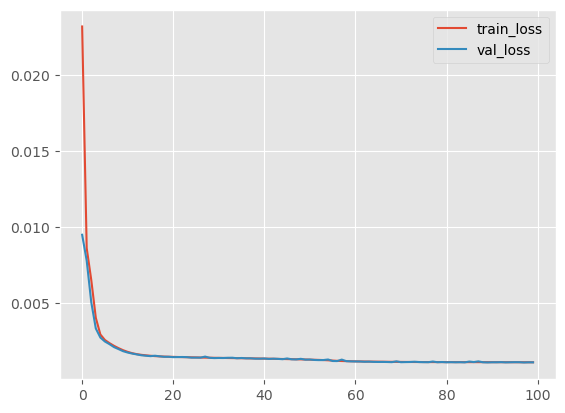

In [100]:
plt.style.use("ggplot")
plt.plot([i for i in range(100)], history.history["loss"], label="train_loss")
plt.plot([i for i in range(100)], history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [ ]:
history.history["loss"]

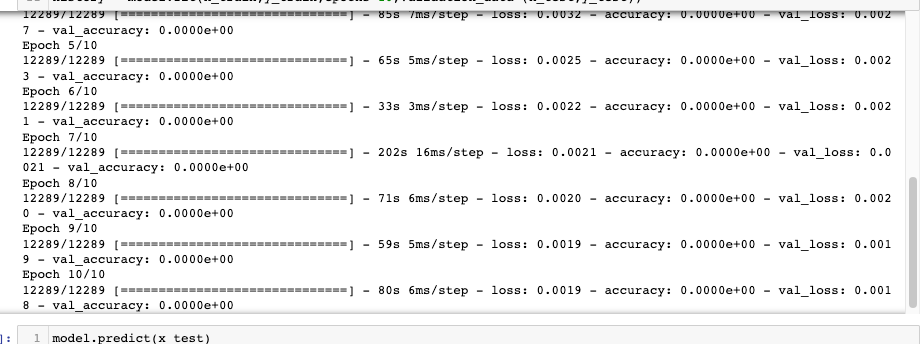

epoch=100
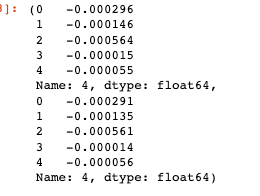
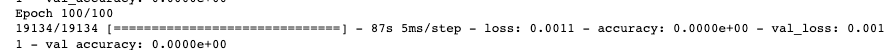

In [94]:
(561-564)/561


-0.0053475935828877